In [40]:
from textblob import TextBlob
import sys
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import emoji
import gensim
nltk.download('stopwords')
nltk.download('wordnet')

stemmer = SnowballStemmer(language='english')
WNLemmatizer = nltk.WordNetLemmatizer()
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Authentication
consumerKey = "6UkdKLghQ2tmKRIhuv4OIXedU"
consumerSecret = "gbtOPrY9yFV1M9cCXcNoHjKAeu4nskFdYHL76m8zyl2ltmozI8"
accessToken = "1351939444157394945-6Zu9vFKS7WpD4ZrbnyoP65cru0Laao"
accessTokenSecret = "YicYkwsovse2V8fqc0g1B22I4ZOsIQPZiozvwHPFgEqXz"
auth = tw.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
# Create the API object passing the auth object
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
input_user_id = r'Bell_Support'
max_fetch = 5000

In [4]:
# Function to fetch tweets
tweets_list = []
def fetch_tweet(username,count):
    
    columns = ['username','created_at',
                  'tweet']
    try:     
        print('Tweets scraping from', username,'account..')
        tweets =tw.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

        tweets_list = [[tweet.user.screen_name,
                        tweet.created_at, tweet.full_text
                        ] for tweet in tweets]
        
        print('Total tweets fetched:',len(tweets_list))
        
        
    except BaseException as e:
          print('failed to fetch tweets, on_status,',str(e))
    
    bell_tweets = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',bell_tweets.shape)

    return bell_tweets

In [5]:
# fetching tweets into a dataframe
bell_tweets = fetch_tweet(input_user_id,max_fetch)

Unexpected parameter: id


Tweets scraping from Bell_Support account..


Rate limit reached. Sleeping for: 76
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected pa

Total tweets fetched: 3250
DataFrame shape: (3250, 3)


In [6]:
bell_tweets.sample(5)

,username,created_at,tweet
2302,Bell_Support,2021-09-01 19:34:43+00:00,@ITweetBBQ We are sorry to hear that you are h...
1927,Bell_Support,2021-09-14 12:30:52+00:00,@Queenie58908592 Hi there. We are sorry to lea...
1002,Bell_Support,2021-10-31 02:56:09+00:00,@thirstyfoxo We're sorry to learn about this. ...
797,Bell_Support,2021-11-10 01:24:53+00:00,@doc2k16 We're sorry to know you're experienci...
1842,Bell_Support,2021-09-20 20:23:47+00:00,"@ambermomof5 Good afternoon,\nWe are very sorr..."


In [7]:
input_user_id = r'RogersHelps'
max_fetch = 5000

In [8]:
# Function to fetch tweets
tweets_list = []
def fetch_tweet(username,count):
    
    columns = ['username','created_at',
                  'tweet']
    try:     
        print('Tweets scraping from', username,'account..')
        tweets =tw.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

        tweets_list = [[tweet.user.screen_name,
                        tweet.created_at, tweet.full_text
                        ] for tweet in tweets]
        
        print('Total tweets fetched:',len(tweets_list))
        
        
    except BaseException as e:
          print('failed to fetch tweets, on_status,',str(e))
    
    rogers_tweet = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',rogers_tweet.shape)

    return rogers_tweet

In [9]:
# fetching tweets into a dataframe
rogers_tweet = fetch_tweet(input_user_id,max_fetch)

Unexpected parameter: id


Tweets scraping from RogersHelps account..


Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


Total tweets fetched: 3250
DataFrame shape: (3250, 3)


In [10]:
rogers_tweet.sample(5)

,username,created_at,tweet
97,RogersHelps,2021-12-08 19:59:28+00:00,@ooglesam Hello Sam! I'd be looking for answer...
496,RogersHelps,2021-12-01 01:23:49+00:00,@tazz_999 Hey TC! Thank you for reaching out ...
2029,RogersHelps,2021-10-29 02:38:22+00:00,@leeannelv1 You're welcome! ^EY
592,RogersHelps,2021-11-29 07:39:10+00:00,@JoePelley Hi Joe! Thank you for reaching out ...
1228,RogersHelps,2021-11-15 18:10:03+00:00,"@shelbymonita Hey Shelby, spam calls are very ..."


In [11]:
input_user_id = r'TELUSsupport'
max_fetch = 5000

In [16]:
# Function to fetch tweets
tweets_list = []
def fetch_tweet(username,count):
    
    columns = ['username','created_at',
                  'tweet']
    try:     
        print('Tweets scraping from', username,'account..')
        tweets =tw.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

        tweets_list = [[tweet.user.screen_name,
                        tweet.created_at, tweet.full_text
                        ] for tweet in tweets]
        
        print('Total tweets fetched:',len(tweets_list))
        
        
    except BaseException as e:
          print('failed to fetch tweets, on_status,',str(e))
    
    telus_tweets = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',telus_tweets.shape)

    return telus_tweets

In [17]:
# fetching tweets into a dataframe
telus_tweets = fetch_tweet(input_user_id,max_fetch)

Unexpected parameter: id


Tweets scraping from TELUSsupport account..


Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


Total tweets fetched: 3250
DataFrame shape: (3250, 3)


In [18]:
telus_tweets.sample(5)

,username,created_at,tweet
1058,TELUSsupport,2021-10-29 19:20:06+00:00,@VincentDube4444 En fait nous ne pouvons pas l...
64,TELUSsupport,2021-12-08 15:38:38+00:00,"@tracylyn44 Sorry about that, Tracy! This may ..."
1859,TELUSsupport,2021-10-04 22:00:31+00:00,"In recognition of our amazing team, we wish yo..."
246,TELUSsupport,2021-12-01 02:18:16+00:00,@genesisluvr Can you send us a direct message?...
1406,TELUSsupport,2021-10-18 18:48:12+00:00,"@MrsSteak Hey there, you can contact our fibre..."


In [19]:
input_user_id = r'freedomsupport'
max_fetch = 5000

In [20]:
# Function to fetch tweets
tweets_list = []
def fetch_tweet(username,count):
    
    columns = ['username','created_at',
                  'tweet']
    try:     
        print('Tweets scraping from', username,'account..')
        tweets =tw.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

        tweets_list = [[tweet.user.screen_name,
                        tweet.created_at, tweet.full_text
                        ] for tweet in tweets]
        
        print('Total tweets fetched:',len(tweets_list))
        
        
    except BaseException as e:
          print('failed to fetch tweets, on_status,',str(e))
    
    freedom = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',freedom.shape)

    return freedom

In [21]:
# fetching tweets into a dataframe
freedom = fetch_tweet(input_user_id,max_fetch)

Unexpected parameter: id


Tweets scraping from freedomsupport account..


Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


Total tweets fetched: 3250
DataFrame shape: (3250, 3)


In [22]:
freedom.sample(5)

,username,created_at,tweet
1337,freedomsupport,2021-09-07 13:00:12+00:00,🥱 We are here and waiting for the coffee to ki...
2227,freedomsupport,2021-06-25 22:05:18+00:00,"@GuerraGianni4 Hi Guerra, I'm very sorry to he..."
2317,freedomsupport,2021-06-14 21:47:02+00:00,"@B__Labz Hi there, thank you for reaching out ..."
869,freedomsupport,2021-10-09 19:09:29+00:00,@xi6os Shaw Mobile is a great option for those...
813,freedomsupport,2021-10-14 01:13:20+00:00,"@roycerivard23 Yes, we totally got that! I use..."


In [27]:
bell_tweets.to_csv('bell.csv', encoding='utf-8', index=False)

In [28]:
rogers_tweet.to_csv('rogers.csv', encoding='utf-8', index=False)

In [29]:
telus_tweets.to_csv('telus.csv', encoding='utf-8', index=False)

In [30]:
freedom.to_csv('freedom.csv', encoding='utf-8', index=False)

In [32]:
df1 = pd.read_csv('bell.csv')
df1.head()

,username,created_at,tweet
0,Bell_Support,2021-12-10 04:30:51+00:00,@67idjit Hello there. Thanks for reaching out....
1,Bell_Support,2021-12-10 03:07:29+00:00,@JohnRob22316950 Hello there. We are sorry to ...
2,Bell_Support,2021-12-10 00:01:12+00:00,@aeris_mel Good evening. Thanks for reaching o...
3,Bell_Support,2021-12-09 23:30:11+00:00,@kemmmj We are sorry to hear about this situat...
4,Bell_Support,2021-12-09 23:09:56+00:00,@rhondastew We would be more than happy to pro...


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    3250 non-null   object
 1   created_at  3250 non-null   object
 2   tweet       3250 non-null   object
dtypes: object(3)
memory usage: 76.3+ KB


In [35]:
# Drop the samples with missing data
df1.dropna(inplace=True)
df1.head()

,username,created_at,tweet
0,Bell_Support,2021-12-10 04:30:51+00:00,@67idjit Hello there. Thanks for reaching out....
1,Bell_Support,2021-12-10 03:07:29+00:00,@JohnRob22316950 Hello there. We are sorry to ...
2,Bell_Support,2021-12-10 00:01:12+00:00,@aeris_mel Good evening. Thanks for reaching o...
3,Bell_Support,2021-12-09 23:30:11+00:00,@kemmmj We are sorry to hear about this situat...
4,Bell_Support,2021-12-09 23:09:56+00:00,@rhondastew We would be more than happy to pro...


In [55]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'https?\/\/[A-Za-z0-9\/]+','',txt)
    return txt

In [56]:
df1['Tweet_pre_processed']= df1['tweet'].apply(cleanUpTweet)

In [57]:
df1.sample(6)

,username,created_at,tweet,Tweet_pre_processed
30,Bell_Support,2021-12-08 21:03:25+00:00,"@SezChris Hi Chris, If you have any concerns w...","Hi Chris, If you have any concerns with your ..."
2462,Bell_Support,2021-08-23 22:49:04+00:00,"@Empress_Emilyy Hi, thank you for reaching out...","Hi, thank you for reaching out to us about th..."
1218,Bell_Support,2021-10-19 22:05:13+00:00,"@UrGirlSaigon HI there, we are sorry to hear a...","HI there, we are sorry to hear about this con..."
2523,Bell_Support,2021-08-19 15:36:07+00:00,@sarahbooj Good morning. We're very sorry to r...,Good morning. We're very sorry to read about ...
1326,Bell_Support,2021-10-14 15:31:12+00:00,"@colleenlaramo Hi there, we are sorry to learn...","Hi there, we are sorry to learn about this in..."
1234,Bell_Support,2021-10-19 12:35:27+00:00,@umeshdabhi We'd be more than happy to check t...,We'd be more than happy to check to see if th...


In [58]:
bell=df1['Tweet_pre_processed']

In [59]:
bell

0        Hello there. Thanks for reaching out. We want...
1        Hello there. We are sorry to know about your ...
2        Good evening. Thanks for reaching out. To con...
3        We are sorry to hear about this situation. If...
4        We would be more than happy to provide furthe...
                              ...                        
3245     Good afternoon Liz,\nWe are very sorry to hea...
3246     Good afternoon. Kindly send us a direct messa...
3247     Thank you for the clarification on your conce...
3248     Hi there, thanks for reaching out to us about...
3249     Hi there, if you wish to ask about anything a...
Name: Tweet_pre_processed, Length: 3250, dtype: object

In [61]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [62]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [64]:
df1['Subjectivity']=df1['Tweet_pre_processed'].apply(getTextSubjectivity)
df1['Polarity']=df1['Tweet_pre_processed'].apply(getTextPolarity)

In [71]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [72]:
df1['Score']=df1['Polarity'].apply(getTextAnalysis)

In [73]:
df1.head(50)

,username,created_at,tweet,Tweet_pre_processed,Subjectivity,Polarity,Score
0,Bell_Support,2021-12-10 04:30:51+00:00,@67idjit Hello there. Thanks for reaching out....,Hello there. Thanks for reaching out. We want...,0.372222,0.425000,Positive
1,Bell_Support,2021-12-10 03:07:29+00:00,@JohnRob22316950 Hello there. We are sorry to ...,Hello there. We are sorry to know about your ...,0.650000,0.250000,Positive
2,Bell_Support,2021-12-10 00:01:12+00:00,@aeris_mel Good evening. Thanks for reaching o...,Good evening. Thanks for reaching out. To con...,0.525000,0.325000,Positive
3,Bell_Support,2021-12-09 23:30:11+00:00,@kemmmj We are sorry to hear about this situat...,We are sorry to hear about this situation. If...,0.650000,-0.250000,Negative
4,Bell_Support,2021-12-09 23:09:56+00:00,@rhondastew We would be more than happy to pro...,We would be more than happy to provide furthe...,0.562500,0.224242,Positive
5,Bell_Support,2021-12-09 23:05:17+00:00,@rhondastew Please DM us for further discussio...,Please DM us for further discussion on this! ...,0.500000,0.000000,Neutral
6,Bell_Support,2021-12-09 22:57:37+00:00,"@rhondastew Hi there,\nPlease visit the below ...","Hi there,\nPlease visit the below link for fu...",0.550000,0.150000,Positive
7,Bell_Support,2021-12-09 22:46:44+00:00,@ProfDanBear We are sorry to hear about this e...,We are sorry to hear about this experience an...,0.474286,0.162857,Positive
8,Bell_Support,2021-12-09 22:18:26+00:00,@KeepYerHeadOn Hello there. Thanks for reachin...,Hello there. Thanks for reaching out. We'd li...,0.200000,0.200000,Positive
9,Bell_Support,2021-12-09 22:02:29+00:00,"@stace_smith94 Hi there, we are sorry to hear ...","Hi there, we are sorry to hear this had happe...",0.493750,-0.156250,Negative


In [83]:
positive=df1[df1['Score']=="Positive"]
print(str(positive.shape[0]/(df1.shape[0])*100)+" % of Positive tweets")
pos= positive.shape[0]/df1.shape[0]*100

negative=df1[df1['Score']=="Negative"]
print(str(negative.shape[0]/(df1.shape[0])*100)+" % of Negative tweets")
neg= negative.shape[0]/df1.shape[0]*100

neutral=df1[df1['Score']=="Neutral"]
print(str(neutral.shape[0]/(df1.shape[0])*100)+" % of Neutral tweets")
nut= neutral.shape[0]/df1.shape[0]*100

66.73846153846154 % of Positive tweets
25.72307692307692 % of Negative tweets
7.538461538461538 % of Neutral tweets


In [84]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=(pos,neg,nut)
colors=['yellowgreen','lightcoral','gold']

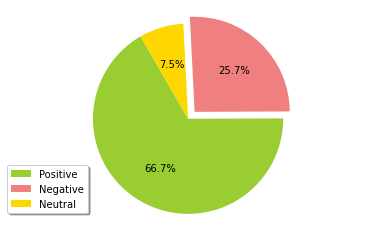

In [87]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis_Bell.png")